# Roteiro Detalhado: Extração de Características e Pré-processamento de Contornos

## 1. Introdução
Este estudo tem como objetivo explorar dois tópicos fundamentais de visão computacional:

- **Vetores de características (Feature Vectors)**
- **Pré-processamento de contornos (Boundary Preprocessing)**

Esses conceitos são amplamente utilizados em tarefas como classificação de objetos, reconhecimento de padrões e análise de formas.

## 2. Vetores de Características (Feature Vectors)
Vetores de características são representações numéricas compactas das propriedades relevantes de objetos em uma imagem. Eles permitem que algoritmos interpretem uma imagem como um conjunto de números, facilitando análises automáticas.

### Etapa 2.1: Carregando e visualizando a imagem
Utilizamos a função `io.imread()` da biblioteca `scikit-image` para carregar uma imagem diretamente de uma URL. Em seguida, usamos `matplotlib.pyplot` para exibi-la.

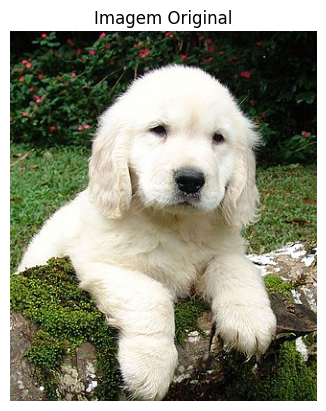

In [58]:
from skimage import io, color, measure, filters
import matplotlib.pyplot as plt

# Carregando imagem de exemplo
image = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Golde33443.jpg/320px-Golde33443.jpg')
plt.imshow(image)
plt.axis('off')
plt.title('Imagem Original')
plt.show()

### Etapa 2.2: Conversão para escala de cinza
A conversão para tons de cinza é feita com `color.rgb2gray()`. Isso simplifica a imagem para um único canal de intensidade luminosa.

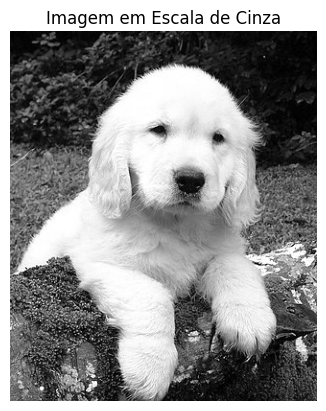

In [59]:
gray = color.rgb2gray(image)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('Imagem em Escala de Cinza')
plt.show()

### Etapa 2.3: Binarização da imagem
A binarização separa os objetos do fundo. Usamos o método de Otsu para encontrar automaticamente um limiar (`threshold_otsu`). A imagem binária resultante contém apenas pixels `True` (objeto) ou `False` (fundo).

O (`threshold_otsu`) analisa o histograma de intensidade e escolhe um ponto de corte (threshold) que separa o que provavelmente é fundo do que é objeto.

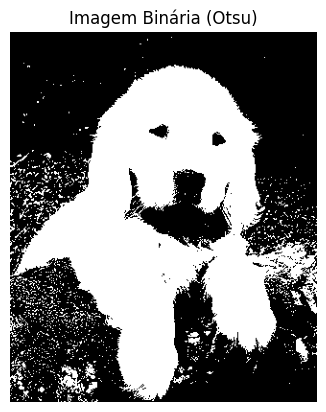

In [60]:
thresh = filters.threshold_otsu(gray)
binary = gray > thresh

plt.imshow(binary, cmap='gray')
plt.title('Imagem Binária (Otsu)')
plt.axis('off')

plt.show()

### Etapa 2.4: Rotulagem de regiões e extração de características

### O que são as "regiões" na imagem binária?

Após a binarização da imagem, as áreas brancas representam os objetos detectados. Quando aplicamos `measure.label()`, cada grupo de pixels brancos conectados entre si é rotulado como uma **região independente**.

Essas regiões representam **possíveis objetos na imagem** — por exemplo, células, animais, peças, ou qualquer forma presente.

### Por que extrair características das regiões?

As propriedades geométricas extraídas nos permitem **descrever quantitativamente cada objeto**, transformando sua forma em dados numéricos que podem ser analisados, comparados ou classificados por algoritmos.

As principais características utilizadas são:

- **Área**: número total de pixels da região (tamanho do objeto)
- **Perímetro**: comprimento da borda do objeto
- **Excentricidade**: mede o quanto a forma se parece com uma elipse alongada (0 = círculo, 1 = linha)
- **Compacidade**: `(perímetro² / área)` — quanto maior, mais irregular ou pontuda é a forma

> Essas métricas são chamadas de **vetores de características**, pois são os números que representam a forma de cada objeto. Elas são fundamentais para sistemas de classificação e reconhecimento de padrões.

### Aplicações práticas: Algoritmos que usam vetores de características

Os vetores de características extraídos das regiões da imagem podem ser usados como entrada para algoritmos de aprendizado de máquina e reconhecimento de padrões. Abaixo estão alguns exemplos:


| Algoritmo                | O que faz                                                                 |
|--------------------------|---------------------------------------------------------------------------|
| **K-Nearest Neighbors**  | Classifica objetos com base nos mais próximos no espaço das características. |
| **Support Vector Machine (SVM)** | Encontra a melhor linha ou plano que separa classes de objetos.             |
| **Decision Tree**        | Usa regras lógicas (ex: "área > 100?") para classificar os objetos.       |
| **Random Forest**        | Conjunto de várias árvores de decisão para melhorar a robustez.           |
| **K-Means Clustering**   | Agrupa objetos com características similares, sem precisar de rótulos.    |

> Esses algoritmos são amplamente utilizados em tarefas como: detecção de células, reconhecimento de escrita, análise de formas industriais e reconhecimento de gestos.

Com a imagem binária, aplicamos `measure.label()` para identificar objetos conectados. Em seguida, usamos `regionprops()` para calcular propriedades:

- `area`: número de pixels do objeto
- `perimeter`: perímetro do contorno
- `eccentricity`: relação entre os eixos da elipse ajustada
- `compactness`: (perímetro²) / área, usada para comparar formas

In [ ]:
label_img = measure.label(binary)
regions = measure.regionprops(label_img)

def extrair_caracteristicas(regions, titulo=''):
    print(f'\nCaracterísticas {titulo}:')
    for i, region in enumerate(regions):
        print(f"Objeto {i+1}")
        print(f"Área: {region.area}")
        print(f"Perímetro: {region.perimeter:.2f}")
        print(f"Excentricidade: {region.eccentricity:.3f}")
        print(f"Compacidade: {(region.perimeter ** 2) / region.area:.2f}")
        print('---')

extrair_caracteristicas(regions)


## 3. Pré-processamento de Contornos

O termo "Boundary Preprocessing" se refere a **qualquer técnica que melhora a definição dos contornos dos objetos** antes de extrair características mais precisas.

Existem várias abordagens, como:
- **Operações morfológicas** (dilatação, erosão, fechamento, abertura)
- **Filtros de suavização** (como Gaussiano)
- **Remoção de ruídos pequenos**
- **Preenchimento de buracos**

Neste exemplo, utilizamos **fechamento morfológico**, que é eficaz para **preencher pequenos buracos e suavizar imperfeições nos objetos binarizados**.

In [62]:
from skimage import morphology

smoothed = morphology.closing(binary, morphology.disk(3))

### Etapa 3.2: Comparação antes e depois do pré-processamento
Visualizamos a imagem binária original e a versão suavizada lado a lado para entender o efeito do fechamento.

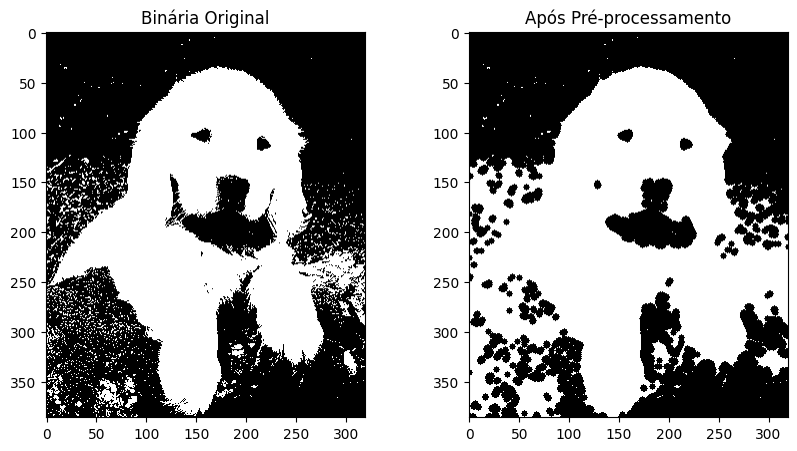

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(binary, cmap='gray')
axes[0].set_title('Binária Original')
axes[1].imshow(smoothed, cmap='gray')
axes[1].set_title('Após Pré-processamento')
plt.show()

> - A **área** tende a aumentar (buracos preenchidos).
> - O **perímetro** tende a diminuir (bordas suavizadas).
> - A **excentricidade** e a **compacidade** tornam-se mais estáveis.

> ⚠️ **Nota importante**:
> Embora o fechamento morfológico tenda a preencher buracos e suavizar contornos, ele pode **desfigurar a forma original** caso o objeto esteja muito próximo de ruídos no fundo.
>
> Isso acontece porque a operação de dilatação seguida de erosão pode incorporar partes do fundo ao objeto e não recuperá-las corretamente, gerando **novos buracos internos** e **alterando o contorno**.
>
> Portanto, ao usar pré-processamento, é importante ajustar:
> - O **tipo de operação** (fechamento, abertura, etc.)
> - O **tamanho do elemento estruturante**
> - E até aplicar etapas anteriores, como remoção de ruído por mediana ou morfologias adicionais.


### Por que o pré-processamento ajuda na extração de características?

Após a binarização, a imagem pode conter imperfeições como buracos, ruídos ou contornos irregulares. Essas falhas comprometem as medidas extraídas dos objetos, como área e perímetro.

O fechamento morfológico, usado neste experimento, atua preenchendo pequenos buracos e suavizando os contornos. Isso faz com que:

- A **área** dos objetos seja mais próxima da realidade.
- O **perímetro** não seja inflado por detalhes indesejados.
- A **forma geral** do objeto seja mais estável, o que melhora medidas como excentricidade e compacidade.

Portanto, o pré-processamento torna a representação do objeto mais fiel e consistente para análise computacional.
